# Sentiment Analysis
----

## Data Load

In [57]:
import pandas as pd

# corpus/economics.corpus
df_corpus = pd.read_pickle('corpus/economics.corpus')
df_corpus.sample(5)

,AvgTone,EventID,sentiment,text,url
170,-5.098039,749568994,-1,"""While geopolitics have consistently been an i...",449 http://www.businesstimes.com.sg:80/inve...
443,-0.516351,715456746,0,[JAKARTA] Indonesia and Freeport-McMoRan may s...,1243 http://www.businesstimes.com.sg/energy...
884,4.899135,599149778,1,Bank Indonesia (BI) announced the inauguration...,1696 http://www.econotimes.com/Bank-Indones...
519,2.853897,698175363,1,"SINGAPORE, Oct. 16, 2017 /PRNewswire/ -- Chope...",1342 http://markets.businessinsider.com/new...
964,-1.973180,571483969,-1,SINGAPORE Prime Minister Lee Hsien Loong is on...,1794 http://www.businesstimes.com.sg/govern...


In [58]:
df_corpus.shape

(1207, 5)

## Data Preparation

In [61]:
from sklearn.model_selection import train_test_split

X = df_corpus.text
i = df_corpus.url
X_train, X_test, i_train, i_test = train_test_split(X, i, test_size=0.02, random_state=42)

In [62]:
from nltk.stem.porter import PorterStemmer
import re
from nltk import word_tokenize         

porter_stemmer = PorterStemmer()

def custom_tokenizer(str_input):
    words = re.sub(r"[^a-z]|\b\w{0,3}\b", " ", str_input).lower().split()
#     words = [porter_stemmer.stem(word) for word in words]
    return words

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems
    
def get_similarity_matrix(content_as_str):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2,
                                       stop_words='english',use_idf=True,
                                       tokenizer=tokenize_and_stem, ngram_range=(1,3))
    tfidf_matrix = tfidf_vectorizer.fit_transform(content_as_str) #fit the vectorizer to synopses
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return (similarity_matrix, tfidf_matrix)


In [75]:
# ekstraksi fitur

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(["jakarta","jokowi",'said','says','just',
                                               "widodo","joko",'singapore','www','com'
                                               'indonesia','indonesians','bali','japan','korea',
                                               'indonesian','thailand','china', 'asia', 'asian',
                                               'vietnam','australian','australia', 'york','s','java','chinese',
                                               'india','malaysia','hong'])
my_stop_words = my_stop_words.union(["january","february","march",'april','may','june','july','august','september','october','november','december'])

my_stop_words = my_stop_words.union(["sunday","monday","tuesday",'thursday','wednesday','friday','year','years'
                                     'days','week','weeks','day','date','time'])


vectorizer = TfidfVectorizer(analyzer=u'word', tokenizer=custom_tokenizer, stop_words=my_stop_words, min_df=0.05, max_df=0.8, lowercase=True)
X = vectorizer.fit_transform(X_train)

X_train_dtm = vectorizer.transform(X_train)

In [116]:
pd.DataFrame(X_train_dtm.toarray(), columns=vectorizer.get_feature_names())

,able,access,according,account,accused,achieve,action,actions,activists,activities,...,women,work,worked,workers,working,world,worst,worth,writing,years
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151594,0.090030,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044064
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.074723,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.044644,0.028968,0.000000,0.000000,0.000000,0.022981,0.027296,0.054807,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.012481,0.000000,0.000000,0.000000,0.066798
3,0.000000,0.000000,0.019592,0.000000,0.000000,0.000000,0.000000,0.000000,0.037067,0.139906,...,0.000000,0.118218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018071
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250612,0.000000
5,0.000000,0.000000,0.034634,0.000000,0.000000,0.000000,0.109904,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029844,0.000000,0.000000,0.000000,0.031946
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.159436,0.055340,0.000000,0.061888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.173340,0.000000,0.000000,0.000000,0.000000,0.065215,0.000000,0.000000,0.066242
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039900


# K-Means Clustering 
----

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

true_k = 8

model = KMeans(n_clusters=true_k, init='k-means++', random_state=42, max_iter=100, n_init=2)
model.fit(X_train_dtm)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    
    t = []
    for ind in order_centroids[i, :40]:
        t.append(terms[ind])
    
    print("Cluster %d:" % i, ','.join(t),'\n')


Top terms per cluster:
Cluster 0: percent,energy,trade,government,mining,investment,ministry,minister,company,companies,billion,exports,country,economic,foreign,reuters,agreement,countries,world,export,president,power,growth,imports,economy,industry,million,business,project,sector,state,development,infrastructure,deal,largest,finance,south,market,told,workers 

Cluster 1: palm,deforestation,plantations,forest,land,companies,sustainable,company,sustainability,supply,industry,plantation,group,environmental,chain,policy,cent,report,greenpeace,mongabay,farmers,forests,production,hectares,million,communities,practices,concessions,world,tonnes,association,campaign,european,papua,development,issues,haze,areas,business,clearing 

Cluster 2: coal,energy,power,mining,plants,plant,emissions,climate,pollution,cent,water,government,greenpeace,project,environmental,company,million,court,local,resources,expansion,change,kalimantan,demand,owned,capacity,country,planned,philippines,group,ministry,impac

In [87]:
X_test_dtm = vectorizer.transform(X_test)
prediction = model.predict(X_test_dtm)

result = pd.DataFrame(i_test)
result['cluster'] = prediction
result

,url,cluster
101,2026 http://www.businesswire.com/news/home/...,1
260,424 http://www.eco-business.com/news/dutch-...,2
1083,1903 http://www.businesstimes.com.sg:80/ene...,0
109,1880 http://www.businessinsider.com/r-indon...,1
649,1497 http://www.businessinsider.com/r-updat...,0
736,225 https://www.businessinsider.com.au/bill...,1
332,1041 http://www.econotimes.com/Palu-earthqu...,1
49,304 http://www.eco-business.com/news/have-w...,2
461,1296 http://www.econotimes.com/Global-Geo-p...,0
921,1764 http://www.businessinsider.com/r-indon...,1


In [88]:
#set up cluster names using a dict

cluster_names = {0: 'International Trade and Investment', 
                 1: 'Corporate Business', 
                 2: 'Energy', 
                 3: 'Security', 
                 4: 'Environment', 
                 5: 'Tourism',
                 6: 'Government Policy',
                 7: 'Forest'}


In [ ]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit(X_train_dtm, ["Cluster {}".format(c) for c in model.labels_])
tsne.poof()

### Evaluation

In [89]:
from scipy.spatial.distance import pdist, euclidean
def DaviesBouldin(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]
    variances = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    db = []

    for i in range(n_cluster):
        for j in range(n_cluster):
            if j != i:
                db.append((variances[i] + variances[j]) / euclidean(centroids[i], centroids[j]))

    return(np.max(db) / n_cluster)

In [90]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

labels = model.labels_
dbi_score = DaviesBouldin(X_train_dtm.toarray(), labels)  
print("DBI Score", dbi_score)

DBI Score 1.3800101502477289
Sil Score 0.02936165482697593


## Find optimal Clusters

In [115]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, n_init=2,
        random_state=0)
    kmeans.fit(X_train_dtm)
    labels = kmeans.labels_
    dbi_score = DaviesBouldin(X_train_dtm.toarray(), labels)  
    print("DBI Score for n=",i,' :', dbi_score)
        
#     sil_score = davies_bouldin_score(X_train_dtm.toarray(), labels)  
#     print("DBI2 Score", sil_score, "\n")

DBI Score for n= 2  : 2.119250795872055
DBI Score for n= 3  : 2.3088212865765256
DBI Score for n= 4  : 1.7268703168057398
DBI Score for n= 5  : 1.3916325769639208
DBI Score for n= 6  : 1.107631727544044
DBI Score for n= 7  : 1.1011387980448706
DBI Score for n= 8  : 0.6762542290761472
DBI Score for n= 9  : 0.7341767239453901


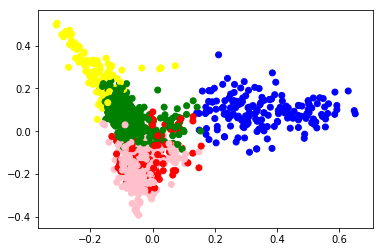

In [91]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pca.fit_transform(X_train_dtm.toarray())

colors = ['red','green','blue','yellow','pink','brown','aqua']


result = pd.DataFrame(transformed)
result['cluster'] = labels
result['color'] = list(map(lambda x: colors[x], labels))

plt.scatter(result[0], result[1], c=result['color'])
# plt.legend()
plt.show()

# MiniBatchKMeans Clustering 
----

In [112]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
   
n = 10
kmeans = MiniBatchKMeans(n_clusters=n, init_size = 2*n,
        random_state=0, 
        batch_size=1)
kmeans.fit(X_train_dtm)

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(n):    
    t = []
    for ind in order_centroids[i, :40]:
        t.append(terms[ind])
    
    print("Cluster %d:" % i, ','.join(t),'\n')

Cluster 0: cent,investment,rupiah,companies,revenue,growth,trillion,foreign,countries,budget,amid,firms,cash,government,group,costs,nations,finance,bloomberg,rate,money,islands,asean,dollars,market,sentifi,voices,individuals,east,emerging,company,businesses,corruption,grow,bank,markets,overseas,anti,benefit,parliament 

Cluster 1: government,muslim,food,coal,islands,islamic,country,considered,company,project,trade,officials,told,owned,action,claims,right,deal,contact,line,practices,foreign,long,energy,like,imports,good,research,failed,senior,contract,lead,market,industry,police,world,local,area,state,children 

Cluster 2: insider,ensure,watch,news,according,business,emails,videos,inbox,linkedin,proposed,told,alerts,declared,lost,standards,ground,instagram,highlights,longer,committed,planned,instead,highest,email,pressure,needed,took,operating,taking,facebook,join,life,board,twitter,started,site,follow,address,issue 

Cluster 3: department,administration,percent,trump,secretary,imports,

### Evaluation

In [99]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
dbi_score = DaviesBouldin(X_train_dtm.toarray(), labels)  
print("DBI Score", dbi_score)

sil_score = silhouette_score(X_train_dtm.toarray(), labels)  
print("Sil Score", sil_score)

DBI Score 0.44675060954132106
Sil Score -0.019136944558747773


## Find optimal Clusters

In [111]:
for i in range(2,12):
    kmeans = MiniBatchKMeans(n_clusters=i, init_size=i+2,
        random_state=0,
        batch_size=1)
    kmeans.fit(X_train_dtm)
    labels = kmeans.labels_
    dbi_score = DaviesBouldin(X_train_dtm.toarray(), labels)  
    print("DBI Score for n=",i,' :', dbi_score)
    
#     sil_score = silhouette_score(X_train_dtm.toarray(), labels)  
#     print("Sil Score", sil_score, "\n")
    

DBI Score for n= 2  : 1.945503110766521
DBI Score for n= 3  : 1.3061191528139946
DBI Score for n= 4  : 0.9847615086932527
DBI Score for n= 5  : 0.7872111613360538
DBI Score for n= 6  : 0.6485565999062609
DBI Score for n= 7  : 0.5320731451918547
DBI Score for n= 8  : 0.48725665223212805
DBI Score for n= 9  : 0.44675060954132106
DBI Score for n= 10  : 0.345325237996933
DBI Score for n= 11  : 0.37730489434751957
